https://developers.arcgis.com/python/guide/using-imagery-layers/

In [1]:
from arcgis import GIS

In [2]:
gis = GIS('pro')

<Item title:"TopoBathy" type:Imagery Layer owner:esri>
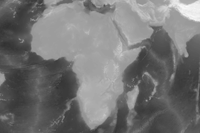

In [9]:
#Find the bathymetry data
results = gis.content.search("Bathymetry",
                             item_type='image',
                             outside_org=True)
results

In [14]:
bathyLyrs = results[0]
bathyLyrs.id

'c753e5bfadb54d46b69c3e68922483bc'

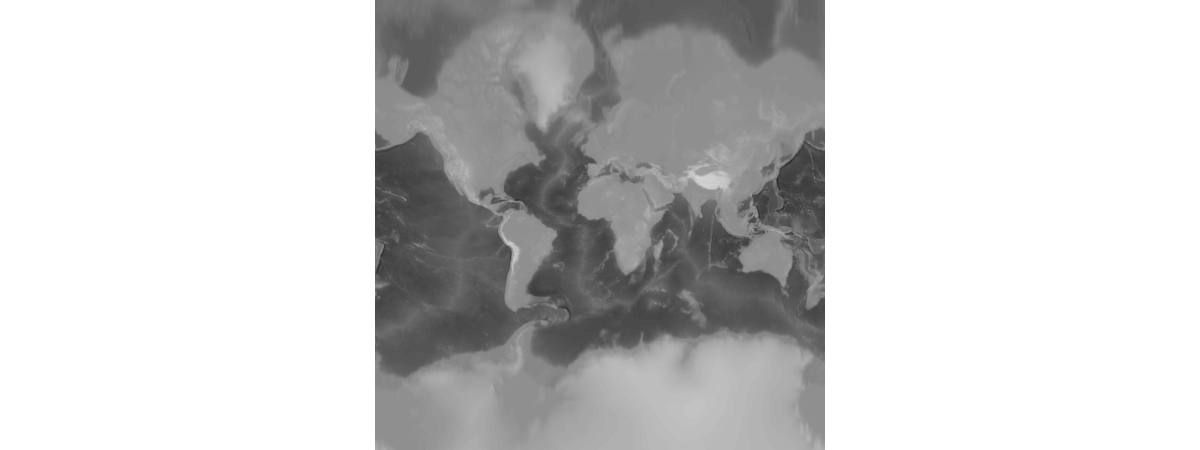

In [16]:
bathyLyr = bathyLyrs.layers[0]
bathyLyr

In [17]:
for fn in bathyLyr.properties.rasterFunctionInfos:
    print(fn['name'])

None
Grayscale_Hillshade
Multi-Directional_Hillshade
Slope_Degrees
Slope_Degrees_Map
Slope_Percent
Elevation_Tinted_Hillshade
None


In [48]:
from arcgis.geometry import Point,Polygon
pt = Point({"x" : -88, "y" : 28, "spatialReference" : {"wkid" : 4326}})
ply = pt.buffer(1).extent

In [50]:
ply

(-89.0, 27.0, -87.0, 29.0)

In [46]:
bathyLyr.compute_stats_and_histograms(pt)

Unable to complete operation.
input object is not a geocentric translation


RuntimeError: Unable to complete operation.
input object is not a geocentric translation
(Error Code: 400)

In [45]:
gom = gis.map("Gulf of Mexico", zoomlevel=6)
#gom.add_layer(bathyLyr)
gom.draw(pt)
gom

MapView(layout=Layout(height='400px', width='100%'), zoom=6.0)